In [11]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [12]:
dataset=pd.read_csv("50_Startups.csv")

In [13]:
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,-1]
#print(X)

encode_x=LabelEncoder()
X_new=encode_x.fit_transform(X.iloc[:,-1])
X.iloc[:,-1]=X_new

ohe=OneHotEncoder(categorical_features=[-1])
X=ohe.fit_transform(X).toarray()
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib64/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [5]:
mind=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
mind.fit(X_train,y_train)
out1=mind.predict(X_test)
out2=np.array(y_test)
error=(abs(out1-out2)/out1)*100
metrics.mean_absolute_error(out2,out1)

2969.052767740502

In [8]:
#to find the minimum test case size and randomization value
mini=1000000 #minimumm error
a=0 #minimum test size value
b=0 #minimum random state value 
for i in np.arange(0.2,1,0.01):
    for j in range(1,100):
        mind=LinearRegression()
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i,random_state=j)
        mind.fit(X_train,y_train)
        out1=mind.predict(X_test)
        out2=np.array(y_test)
        #error=(abs(out1-out2)/out1)*100
        tmp=metrics.mean_absolute_error(out2,out1)
        if tmp<mini:
            mini=tmp
            a=i
            b=j
            
print(str(a)+", "+str(b)+", "+str(mini))

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.

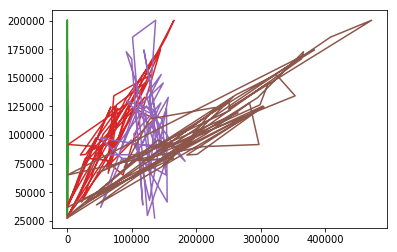

In [7]:
plt.plot(np.array(X_test),out1)

In [14]:
bias_weight=np.ones((50,1))
bias_weight.shape

(50, 1)

In [15]:
X_opt=np.append(arr=bias_weight.astype(int),values=X,axis=1)

In [19]:
X_opt_feature=X_opt[:,[0,1,3,4,5]]
model_opt=sm.OLS(endog=y,exog=X_opt_feature).fit()
model_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 20 May 2019   Prob (F-statistic):           2.90e-28
Time:                        13:55:24   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.57e+04   6502.532      8.565      0.000    4.26e+04    6.88e+04
x1         -1091.1075   3377.087     -0.323      0.748   -7892.910    5710.695
x2         -1130.4509   3344.220     -0.338      0.737   -7866.055    5605.154
x3             0.8609      0.031     27.665      0.000       0.798       0.924
x4            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     7.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""